In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./data/raw/labor_gdpo.csv")
regions = pd.read_csv("./data/reference/wb_regions.csv")

In [4]:
df.head()

,VariableCode,RegionCode,YearCode,AggValue
0,rgdpo,ABW,1970,463.302582
1,rgdpo,ABW,1980,1097.315552
2,rgdpo,ABW,1990,3012.503174
3,rgdpo,ABW,2000,4129.492676
4,emp,ABW,2000,0.041900


In [5]:
regions.rename(columns={"World Region according to the World Bank": "Region"}, inplace=True)
regions.head()

,Entity,Code,Region
0,Aruba,ABW,Latin America and Caribbean
1,Afghanistan,AFG,South Asia
2,Angola,AGO,Sub-Saharan Africa
3,Albania,ALB,Europe and Central Asia
4,Andorra,AND,Europe and Central Asia


In [6]:
df_merged = pd.merge(left=df, right=regions, how="inner", left_on="RegionCode", right_on="Code", suffixes=["","_r"])
df_merged = df_merged.drop(['Entity','Code'], axis=1)

In [7]:
df_merged.head()

,VariableCode,RegionCode,YearCode,AggValue,Region
0,rgdpo,ABW,1970,463.302582,Latin America and Caribbean
1,rgdpo,ABW,1980,1097.315552,Latin America and Caribbean
2,rgdpo,ABW,1990,3012.503174,Latin America and Caribbean
3,rgdpo,ABW,2000,4129.492676,Latin America and Caribbean
4,emp,ABW,2000,0.041900,Latin America and Caribbean


In [8]:
df_merged = df_merged.pivot(index=['Region','RegionCode','VariableCode'], columns=['YearCode'], values=['AggValue'])

In [9]:
df_merged.columns = df_merged.columns.droplevel()

In [10]:
df_merged_2 = df_merged.interpolate(axis=1, limit_direction='forward').interpolate(axis=1, limit_direction='backward').unstack().stack(0)

In [11]:
df_merged_2

VariableCode                                       avh       emp  \
Region                RegionCode YearCode                          
East Asia and Pacific AUS        1960      1978.310818  4.155402   
                                 1970      1942.115953  5.470687   
                                 1980      1909.762827  6.277514   
                                 1990      1863.959761  7.845484   
                                 2000      1847.480068  8.902647   
...                                                ...       ...   
Sub-Saharan Africa    ZWE        1980              NaN  3.138546   
                                 1990              NaN  4.568093   
                                 2000              NaN  5.065894   
                                 2010              NaN  5.753274   
                                 2019              NaN  6.831017   

VariableCode                                       rgdpo  
Region                RegionCode YearCode                 
East Asia and Pacific AUS        1960      165417.390625  
                                 1970      275288.375000  
                                 1980      360221.062500  
                                 1990      507688.343750  
                                 2000      746957.875000  
...                                                  ...  
Sub-Saharan Africa    ZWE        1980       23112.699219  
                                 1990       55286.453125  
                                 2000       39879.613281  
                                 2010       28972.042969  
                                 2019       40820.296875  

[1267 rows x 3 columns]

In [12]:
df_merged_2['avh'] = df_merged_2['avh'].fillna(40*52)

In [13]:
df_merged_2

VariableCode                                       avh       emp  \
Region                RegionCode YearCode                          
East Asia and Pacific AUS        1960      1978.310818  4.155402   
                                 1970      1942.115953  5.470687   
                                 1980      1909.762827  6.277514   
                                 1990      1863.959761  7.845484   
                                 2000      1847.480068  8.902647   
...                                                ...       ...   
Sub-Saharan Africa    ZWE        1980      2080.000000  3.138546   
                                 1990      2080.000000  4.568093   
                                 2000      2080.000000  5.065894   
                                 2010      2080.000000  5.753274   
                                 2019      2080.000000  6.831017   

VariableCode                                       rgdpo  
Region                RegionCode YearCode                 
East Asia and Pacific AUS        1960      165417.390625  
                                 1970      275288.375000  
                                 1980      360221.062500  
                                 1990      507688.343750  
                                 2000      746957.875000  
...                                                  ...  
Sub-Saharan Africa    ZWE        1980       23112.699219  
                                 1990       55286.453125  
                                 2000       39879.613281  
                                 2010       28972.042969  
                                 2019       40820.296875  

[1267 rows x 3 columns]

In [14]:
df_merged_2["avh_emp"] = df_merged_2["avh"]*df_merged_2["emp"]

In [15]:
df_merged_2

VariableCode                                       avh       emp  \
Region                RegionCode YearCode                          
East Asia and Pacific AUS        1960      1978.310818  4.155402   
                                 1970      1942.115953  5.470687   
                                 1980      1909.762827  6.277514   
                                 1990      1863.959761  7.845484   
                                 2000      1847.480068  8.902647   
...                                                ...       ...   
Sub-Saharan Africa    ZWE        1980      2080.000000  3.138546   
                                 1990      2080.000000  4.568093   
                                 2000      2080.000000  5.065894   
                                 2010      2080.000000  5.753274   
                                 2019      2080.000000  6.831017   

VariableCode                                       rgdpo       avh_emp  
Region                RegionCode YearCode                               
East Asia and Pacific AUS        1960      165417.390625   8220.677094  
                                 1970      275288.375000  10624.709252  
                                 1980      360221.062500  11988.563759  
                                 1990      507688.343750  14623.666069  
                                 2000      746957.875000  16447.462920  
...                                                  ...           ...  
Sub-Saharan Africa    ZWE        1980       23112.699219   6528.175659  
                                 1990       55286.453125   9501.634064  
                                 2000       39879.613281  10537.059784  
                                 2010       28972.042969  11966.810837  
                                 2019       40820.296875  14208.514404  

[1267 rows x 4 columns]

In [16]:
df3 = df_merged_2.groupby(['Region','YearCode']).sum()

In [17]:
df3['productivity'] = df3["rgdpo"]/df3["avh_emp"]

In [ ]:
df3.to_csv("./data/final/region_productivity.csv")

In [18]:
df_merged_2['productivity'] = df_merged_2['rgdpo']/df_merged_2['avh_emp']

In [ ]:
df_merged_2.to_csv("./data/final/country_productivity.csv")

<AxesSubplot:xlabel='Region,RegionCode,YearCode'>

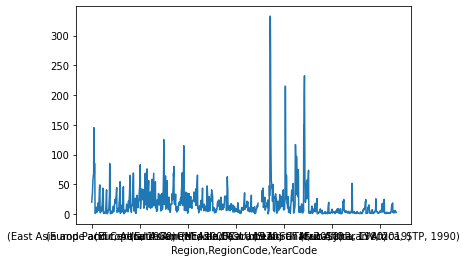

In [20]:
df_merged_2["productivity"].plot()